## Import the required packages and upload the excel file to the dataframe

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
# for Box-Cox Transformation
from scipy import stats

# plotting modules
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

df = pd.read_excel("real-estate-sales.xlsx")


## Explore the data

In [5]:
df.head()


,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,ApartmentUnitNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,OwnerLastName,OwnerFirstName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID
0,30,3,4.0,144-698-048,22.0,NaN,BRISTOL ST,2,6000.0,1422.0,1.0,KHAN,BIBI,ALI MUNTAAZ,2019-12-10,0,136600,07559-0116,5,8
1,50,3,4.0,121-698-073,164.0,NaN,HOLLYWOOD AVE,2,5650.0,1384.0,1.0,GONZALEZ,LOURDES,GONZALEZ JOHNETTE,2019-12-18,179900,158400,07561-0225,1,10
2,58,3,6.0,121-699-090,87.0,NaN,BRISTOL ST,2,5850.0,1249.0,1.0,SAMPAYO,YARLIS,FLOYD ANNIE J ESTATE,2019-05-24,174900,144400,07485-0035,12,1
3,66,3,6.0,144-699-037,55.0,NaN,BRISTOL ST,2,5900.0,1390.0,1.0,CARRILLO PACHECO,RICARDO,HARGROVE DAVID L,2019-09-10,140000,142400,07523-0330,1,10
4,78,3,3.0,144-699-025,5.0,NaN,BRISTOL ST,2,7788.0,960.0,1.0,VARJABEDIAN ROSE M (L.U.),NaN,VARJABEDIAN ANTHONY ( L U),2020-05-14,0,147900,07616-0064,11,7


In [6]:
df.tail()

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,ApartmentUnitNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,OwnerLastName,OwnerFirstName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID
4730,28848,457,NaN,999-999-349,88.0,NaN,BROOK ST,358,NaN,NaN,NaN,BARBOUR EQUITIES LLC,NaN,HLKT BROOK REALTY LLC,2019-01-31,1255000,0,07443-0045,25,10
4731,28851,137,23.0,268-293-024,50.0,B,MORGAN ST,496,NaN,80472.0,96.0,HARTFORD-50 MORGAN LLC,NaN,50 MORGAN HOSPITALITY GROUP LLC,2019-06-26,0,7477100,07496-0114,4,10
4732,28857,457,NaN,999-999-353,451.0,NaN,EDGEWOOD ST,490,0.0,NaN,NaN,MANCORA APARTMENTS LLC,NaN,JACQUI APARTMENTS LLC,2019-01-28,1,0,07441-0295,25,8
4733,28860,118,0.0,271-566-100,111.0,NaN,WYLLYS ST,135,6286.0,NaN,0.0,RESIDENCES ON WYLLYS LLC,NaN,CITINO JOESEPH D,2019-08-05,0,50300,07509-0081,5,8
4734,28861,118,0.0,271-566-101,115.0,NaN,WYLLYS ST,135,6996.0,NaN,0.0,RESIDENCES ON WYLLYS LLC,NaN,CITINO JOESEPH D,2019-08-05,0,56000,07509-0081,5,8


### Find the column types in the dataframe

In [7]:
df.dtypes

PropertyID                          int64
xrCompositeLandUseID                int64
xrBuildingTypeID                  float64
ParcelID                           object
LocationStartNumber               float64
ApartmentUnitNumber                object
StreetNameAndWay                   object
xrPrimaryNeighborhoodID             int64
LandSF                            float64
TotalFinishedArea                 float64
LivingUnits                       float64
OwnerLastName                      object
OwnerFirstName                     object
PrimaryGrantor                     object
SaleDate                   datetime64[ns]
SalePrice                           int64
TotalAppraisedValue                 int64
LegalReference                     object
xrSalesValidityID                   int64
xrDeedID                            int64
dtype: object

## Data Cleansing


### Look for null values

In [8]:
df.isnull().sum()

PropertyID                    0
xrCompositeLandUseID          0
xrBuildingTypeID             16
ParcelID                      0
LocationStartNumber           1
ApartmentUnitNumber        3261
StreetNameAndWay              0
xrPrimaryNeighborhoodID       0
LandSF                      570
TotalFinishedArea           199
LivingUnits                  16
OwnerLastName                 1
OwnerFirstName             2360
PrimaryGrantor                0
SaleDate                      0
SalePrice                     0
TotalAppraisedValue           0
LegalReference                7
xrSalesValidityID             0
xrDeedID                      0
dtype: int64

### This shows nine columns with NaN across the dataframe. I am dropping two columns with the largest missing values 'Apartment Unit Number' and Owner First Name as they are not required in my analysis 

In [9]:
df.drop(columns=['ApartmentUnitNumber', 'OwnerFirstName'], inplace=True)
df.head(5)

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,OwnerLastName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID
0,30,3,4.0,144-698-048,22.0,BRISTOL ST,2,6000.0,1422.0,1.0,KHAN,ALI MUNTAAZ,2019-12-10,0,136600,07559-0116,5,8
1,50,3,4.0,121-698-073,164.0,HOLLYWOOD AVE,2,5650.0,1384.0,1.0,GONZALEZ,GONZALEZ JOHNETTE,2019-12-18,179900,158400,07561-0225,1,10
2,58,3,6.0,121-699-090,87.0,BRISTOL ST,2,5850.0,1249.0,1.0,SAMPAYO,FLOYD ANNIE J ESTATE,2019-05-24,174900,144400,07485-0035,12,1
3,66,3,6.0,144-699-037,55.0,BRISTOL ST,2,5900.0,1390.0,1.0,CARRILLO PACHECO,HARGROVE DAVID L,2019-09-10,140000,142400,07523-0330,1,10
4,78,3,3.0,144-699-025,5.0,BRISTOL ST,2,7788.0,960.0,1.0,VARJABEDIAN ROSE M (L.U.),VARJABEDIAN ANTHONY ( L U),2020-05-14,0,147900,07616-0064,11,7


In [10]:
df.isnull().sum()

PropertyID                   0
xrCompositeLandUseID         0
xrBuildingTypeID            16
ParcelID                     0
LocationStartNumber          1
StreetNameAndWay             0
xrPrimaryNeighborhoodID      0
LandSF                     570
TotalFinishedArea          199
LivingUnits                 16
OwnerLastName                1
PrimaryGrantor               0
SaleDate                     0
SalePrice                    0
TotalAppraisedValue          0
LegalReference               7
xrSalesValidityID            0
xrDeedID                     0
dtype: int64

### I use Scikit-learn to fill in the missing values of Land SF Column using the mean of the column

In [11]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df['LandSF'] = imp_mean.fit_transform(df[['LandSF']])

In [12]:
df.isnull().sum()

PropertyID                   0
xrCompositeLandUseID         0
xrBuildingTypeID            16
ParcelID                     0
LocationStartNumber          1
StreetNameAndWay             0
xrPrimaryNeighborhoodID      0
LandSF                       0
TotalFinishedArea          199
LivingUnits                 16
OwnerLastName                1
PrimaryGrantor               0
SaleDate                     0
SalePrice                    0
TotalAppraisedValue          0
LegalReference               7
xrSalesValidityID            0
xrDeedID                     0
dtype: int64

In [13]:
cols_to_impute = ['xrBuildingTypeID', 'LocationStartNumber', 'TotalFinishedArea', 'LivingUnits']

# Initialize the imputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the specified columns and transform the data
df[cols_to_impute] = imp_mean.fit_transform(df[cols_to_impute])

In [14]:
df.isnull().sum()

PropertyID                 0
xrCompositeLandUseID       0
xrBuildingTypeID           0
ParcelID                   0
LocationStartNumber        0
StreetNameAndWay           0
xrPrimaryNeighborhoodID    0
LandSF                     0
TotalFinishedArea          0
LivingUnits                0
OwnerLastName              1
PrimaryGrantor             0
SaleDate                   0
SalePrice                  0
TotalAppraisedValue        0
LegalReference             7
xrSalesValidityID          0
xrDeedID                   0
dtype: int64

## Data Exploration

### I extract the month from the Sale Date column and create a new column call Sale Month in the dataframe

In [15]:
df['SaleMonth'] = df['SaleDate'].dt.month
df.head()

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,OwnerLastName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID,SaleMonth
0,30,3,4.0,144-698-048,22.0,BRISTOL ST,2,6000.0,1422.0,1.0,KHAN,ALI MUNTAAZ,2019-12-10,0,136600,07559-0116,5,8,12
1,50,3,4.0,121-698-073,164.0,HOLLYWOOD AVE,2,5650.0,1384.0,1.0,GONZALEZ,GONZALEZ JOHNETTE,2019-12-18,179900,158400,07561-0225,1,10,12
2,58,3,6.0,121-699-090,87.0,BRISTOL ST,2,5850.0,1249.0,1.0,SAMPAYO,FLOYD ANNIE J ESTATE,2019-05-24,174900,144400,07485-0035,12,1,5
3,66,3,6.0,144-699-037,55.0,BRISTOL ST,2,5900.0,1390.0,1.0,CARRILLO PACHECO,HARGROVE DAVID L,2019-09-10,140000,142400,07523-0330,1,10,9
4,78,3,3.0,144-699-025,5.0,BRISTOL ST,2,7788.0,960.0,1.0,VARJABEDIAN ROSE M (L.U.),VARJABEDIAN ANTHONY ( L U),2020-05-14,0,147900,07616-0064,11,7,5


### Next I extract the month from the Sale Date column and create a new column call Sale Quarter in the dataframe.

### I used the group by function of Quarterly Sales and calculate the total price from SalePrice column

In [16]:
df['SaleQuarter'] = df['SaleDate'].dt.quarter
quarterly_sales = df.groupby('SaleQuarter')['SalePrice'].sum()
quarterly_sales

SaleQuarter
1     682912951
2     247882984
3     653169968
4    1887341730
Name: SalePrice, dtype: int64

### Vertical Bar Chart of Total Sales Per Quarter 

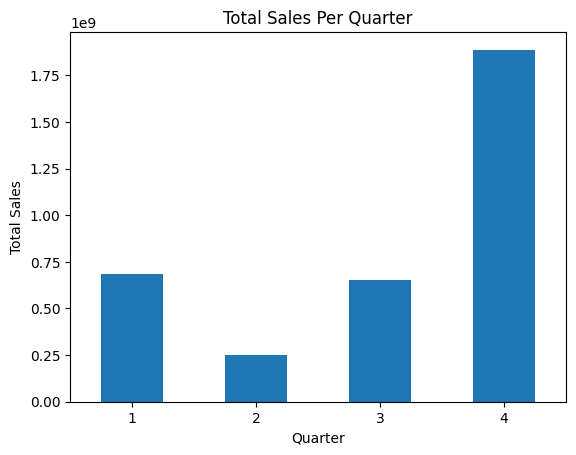

In [17]:
ax = quarterly_sales.plot.bar(x='SaleQuarter', y='SalePrice', rot=0)
ax.set_title('Total Sales Per Quarter')
ax.set_xlabel('Quarter')
ax.set_ylabel('Total Sales')
plt.show()

### Calculate the average sale price per unit of finished area

In [18]:
avg_sale_price_per_area = (df['SalePrice'] / df['TotalFinishedArea']).mean()
avg_sale_price_per_area

inf

### The output of inf means infinite value in Python as the TotalFinished Area column must have rows with a 0 value. Handling the error to first filter out rows = 0

In [19]:
df_filtered = df[df['TotalFinishedArea'] != 0]
avg_sale_price_per_area = (df_filtered['SalePrice'] / df_filtered['TotalFinishedArea']).mean()
avg_sale_price_per_area

813.2021954236579

### Horizontal Bar Chart of Average Sales price per Area 

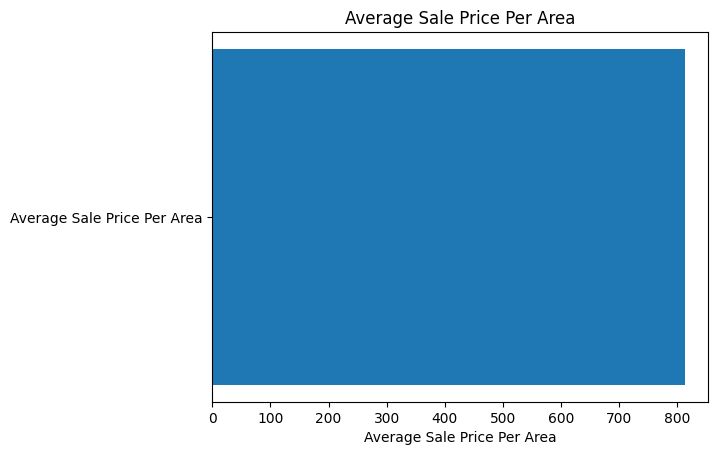

In [20]:
plt.barh(['Average Sale Price Per Area'], [avg_sale_price_per_area])
plt.title('Average Sale Price Per Area')
plt.xlabel('Average Sale Price Per Area')
plt.show()

### Which month has the biggest Sales

In [21]:
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
              7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

df['SaleMonthName'] = df['SaleMonth'].map(month_dict)

df.head()

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,...,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID,SaleMonth,SaleQuarter,SaleMonthName
0,30,3,4.0,144-698-048,22.0,BRISTOL ST,2,6000.0,1422.0,1.0,...,ALI MUNTAAZ,2019-12-10,0,136600,07559-0116,5,8,12,4,December
1,50,3,4.0,121-698-073,164.0,HOLLYWOOD AVE,2,5650.0,1384.0,1.0,...,GONZALEZ JOHNETTE,2019-12-18,179900,158400,07561-0225,1,10,12,4,December
2,58,3,6.0,121-699-090,87.0,BRISTOL ST,2,5850.0,1249.0,1.0,...,FLOYD ANNIE J ESTATE,2019-05-24,174900,144400,07485-0035,12,1,5,2,May
3,66,3,6.0,144-699-037,55.0,BRISTOL ST,2,5900.0,1390.0,1.0,...,HARGROVE DAVID L,2019-09-10,140000,142400,07523-0330,1,10,9,3,September
4,78,3,3.0,144-699-025,5.0,BRISTOL ST,2,7788.0,960.0,1.0,...,VARJABEDIAN ANTHONY ( L U),2020-05-14,0,147900,07616-0064,11,7,5,2,May


### Group the data by month name and calculate the sum of the sale price

In [22]:
monthly_sales = df.groupby('SaleMonthName')['SalePrice'].sum()
max_month = monthly_sales.idxmax()
max_month

'December'

### Bar Chart of which Month has the biggest sale

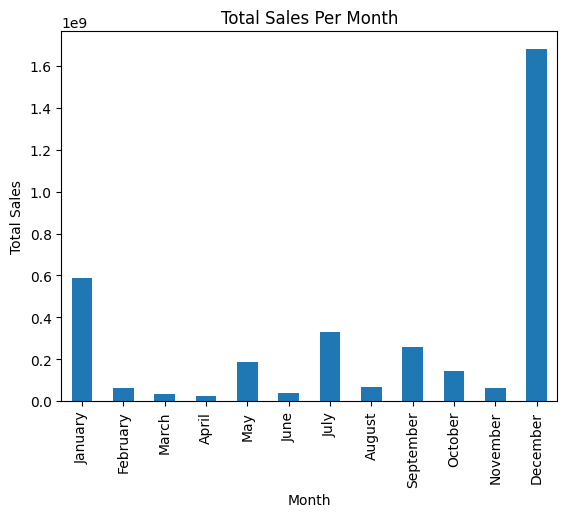

In [23]:
df['SaleMonthName'] = pd.Categorical(df['SaleMonthName'], categories=month_dict.values(), ordered=True)

# Group the data by month name and calculate the sum of the sale price
monthly_sales = df.groupby('SaleMonthName')['SalePrice'].sum()

# Create a bar chart of the total sales per month
ax = monthly_sales.plot.bar()

# Set the title and axis labels
ax.set_title('Total Sales Per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')

# Display the plot
plt.show()

### Stacked Bar Chart of which Month has the biggest sale by Deed ID

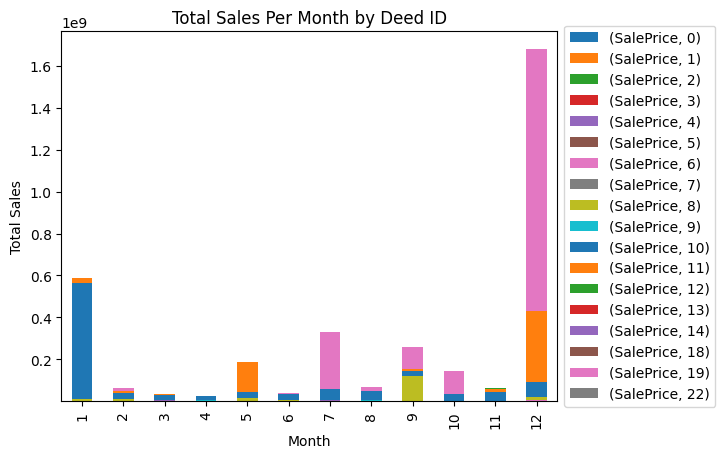

In [24]:
# I use Deed ID as a categorical variable to make stacked bar chart meaningful for Total Sales per month

df['SaleMonthName'] = df['SaleDate'].dt.month
monthly_sales_by_region = df.groupby(['SaleMonthName', 'xrDeedID'])['SalePrice'].sum()
monthly_sales_by_region = monthly_sales_by_region.to_frame().unstack(level='xrDeedID')
ax = monthly_sales_by_region.plot.bar(stacked=True)
ax.set_title('Total Sales Per Month by Deed ID')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [25]:
df.head()

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,...,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID,SaleMonth,SaleQuarter,SaleMonthName
0,30,3,4.0,144-698-048,22.0,BRISTOL ST,2,6000.0,1422.0,1.0,...,ALI MUNTAAZ,2019-12-10,0,136600,07559-0116,5,8,12,4,12
1,50,3,4.0,121-698-073,164.0,HOLLYWOOD AVE,2,5650.0,1384.0,1.0,...,GONZALEZ JOHNETTE,2019-12-18,179900,158400,07561-0225,1,10,12,4,12
2,58,3,6.0,121-699-090,87.0,BRISTOL ST,2,5850.0,1249.0,1.0,...,FLOYD ANNIE J ESTATE,2019-05-24,174900,144400,07485-0035,12,1,5,2,5
3,66,3,6.0,144-699-037,55.0,BRISTOL ST,2,5900.0,1390.0,1.0,...,HARGROVE DAVID L,2019-09-10,140000,142400,07523-0330,1,10,9,3,9
4,78,3,3.0,144-699-025,5.0,BRISTOL ST,2,7788.0,960.0,1.0,...,VARJABEDIAN ANTHONY ( L U),2020-05-14,0,147900,07616-0064,11,7,5,2,5


In [30]:
!jupyter nbconvert --to html Real Estate Analysis.ipynb


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Real' matched no files
[NbConvertApp] WARNING | pattern 'Estate' matched no files
[NbConvertApp] WARNING | pattern 'Analysis.ipynb' matched no files


In [31]:
!jupyter nbconvert --to html Real\ Estate\ Analysis.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Real\\' matched no files
[NbConvertApp] WARNING | pattern 'Estate\\' matched no files
[NbConvertApp] WARNING | pattern 'Analysis.ipynb' matched no files
